# Top-down vs. bottom-up

Suppose we want to compute $3 \times 7 + 2 \times 9$.

*Operator precedence*&mdash;also called &ldquo;order of operations&rdquo;&mdash;is a matter of accepted notational convention. (We could agree on a different convention, in which case we&rsquo;d have to put parentheses in different places to express the same things.) It determines the meaning of an expression. In this example, the expression is a sum of products.

But operator precedence does not always determine *evaluation order*. In this example, we can do the multiplications in either order, but they both must be computed before the addition, because their results are what get added.

This expression tree shows the relationship between the **subproblems**:

In [1]:
from graphviz import Digraph

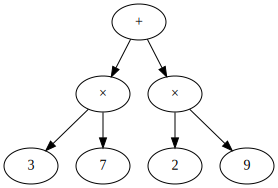

In [2]:
# Draw the tree.
tree = Digraph()
tree.node('left-times', label='\N{MULTIPLICATION SIGN}')
tree.node('right-times', label='\N{MULTIPLICATION SIGN}')
tree.edge('+', 'left-times')
tree.edge('left-times', '3')
tree.edge('left-times', '7')
tree.edge('+', 'right-times')
tree.edge('right-times', '2')
tree.edge('right-times', '9')
tree

*We can evaluate this expression **top-down***, which is naturally recursive. When we try to compute the sum, we notice that the product $3 \times 7$ must first be computed, so do that. For this, we must first know the values of $3$ and $7$, but they&rsquo;re literals, so we already do. Having now *returned* to our effort to compute the sum, we notice that the product $2 \times 9$ must first be computed, so do that. For this, we must know the values of $2$ and $9$, but they&rsquo;re literals, so we do. (Or we could have gone right to left and computed $2 \times 9$ before $3 \times 7$.) Then the sum can be computed.

*Or we can evaluate it **bottom-up***, which is naturally iterative. Notice that the solutions to all subproblems of $3 \times 7$&mdash;the literals $3$ and $7$&mdash;are known, so compute $3 \times 7$. Notice that the solutions to all subproblems of $2 \times 9$&mdash;the literals $2$ and $9$&mdash;are known, so compute $2 \times 9$. (Or we could have gone right to left and computed $2 \times 9$ before $3 \times 7$.) Notice, now, that the solutions to all subproblems of the whole sum are known, so compute it.

Mergesort likewise consists of smaller subproblems whose solutions are needed by bigger subproblems.  You&rsquo;ve implemented **top-down mergesort**, in `recursion.merge_sort`.

Can you implement **bottom-up mergesort**?

---

**Note:** Mergesort doesn&rsquo;t have *overlapping* subproblems, but many other important problems do, and the subject of overlapping subproblems is examined and visualized below.

## General example of a simple case of overlapping subproblems

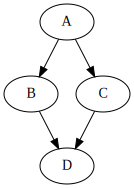

In [3]:
dag = Digraph()
dag.edge('A', 'B')
dag.edge('A', 'C')
dag.edge('B', 'D')
dag.edge('C', 'D')
dag

## Fibonacci

In [4]:
from fibonacci import fibonacci

In [5]:
fibonacci(10)

55

In [6]:
def drawfibn(n):
    fib = Digraph()
    for x in range(n + 1):
        if x == 0:
            fib.node('0')
        elif x ==1:
            fib.node('1')
        else: 
            fib.edge(str(x),str(x-2))
            fib.edge(str(x),str(x-1))
    return fib

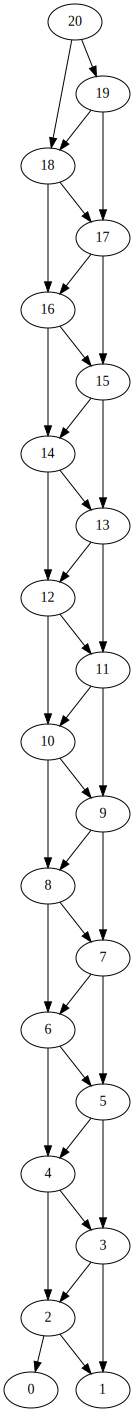

In [7]:
drawfibn(20)

**Note:** The function `fibonacci_better` has been moved to `fibonacci.py`.

In [8]:
# help(dict)

## Mergesort

In [48]:
import itertools

In [49]:
import recursion

In [53]:
def draw_mergesort_subproblems(values, *,
                               sort=recursion.merge_sort,
                               merge=recursion.merge_two):
    """
    Draw a graph of mergesort subproblems.
    
    Leaves show base cases. Internal nodes show return values from merges.
    """
    keep_alive = []  # Put intermediate results here so they are not collected.
    serial_numbers = itertools.count()
    vertices = {}  # id -> serial number
    graph = Digraph()
    
    def get_vertex_name(values):
        """Create a vertex if it does not exist. Return its name."""
        try:
            return str(vertices[id(values)])
        except KeyError:
            keep_alive.append(values)
            vertex_number = vertices[id(values)] = next(serial_numbers)
            vertex_name = str(vertex_number)
            graph.node(vertex_name, label=repr(values))
            return vertex_name
    
    def instrumented_merge(left, right):
        left_name = get_vertex_name(left)
        right_name = get_vertex_name(right)
        parent = merge(left, right)
        print(f'Merged {left!r}, {right!r}, -> {parent!r}.')
        parent_name = get_vertex_name(parent)
        graph.edge(parent_name, left_name)
        graph.edge(parent_name, right_name)
        return parent

    sort(values, merge=instrumented_merge)
    return graph

Merged [20], [10], -> [10, 20].
Merged [30], [10, 20], -> [10, 20, 30].


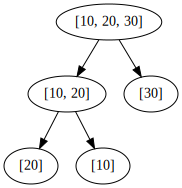

In [54]:
draw_mergesort_subproblems([30, 20, 10])

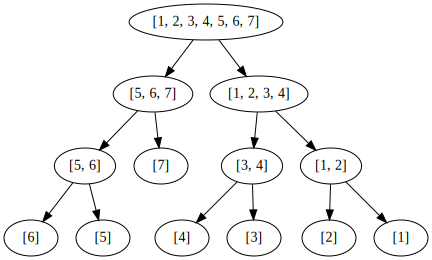

In [52]:
draw_mergesort_subproblems([7, 6, 5, 4, 3, 2, 1])

Merging [5660] with [-6307].
Merging [389] with [3446].
Merging [5315] with [389, 3446].
Merging [-6307, 5660] with [389, 3446, 5315].
Merging [2673] with [1555].
Merging [1597] with [-7129].
Merging [-7225] with [-7129, 1597].
Merging [1555, 2673] with [-7225, -7129, 1597].
Merging [-6307, 389, 3446, 5315, 5660] with [-7225, -7129, 1555, 1597, 2673].


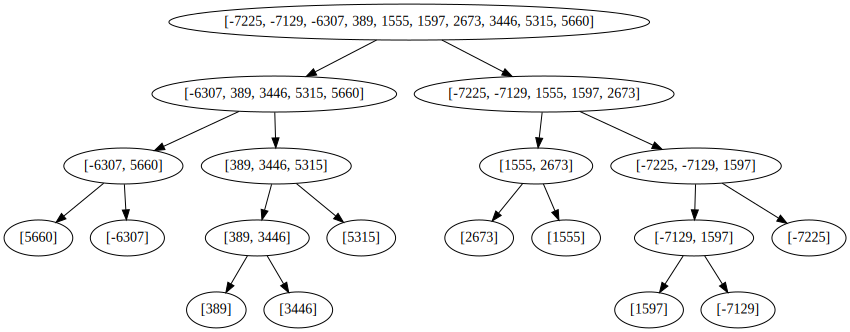

In [46]:
draw_mergesort_subproblems([5660, -6307, 5315, 389, 3446, 2673, 1555, -7225, 1597, -7129])

Merging ['foo'] with ['bar'].
Merging ['baz'] with ['quux'].
Merging ['bar', 'foo'] with ['baz', 'quux'].
Merging ['foobar'] with ['ham'].
Merging ['spam'] with ['eggs'].
Merging ['foobar', 'ham'] with ['eggs', 'spam'].
Merging ['bar', 'baz', 'foo', 'quux'] with ['eggs', 'foobar', 'ham', 'spam'].


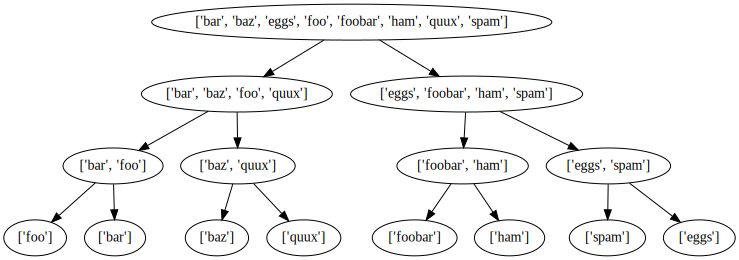

In [45]:
draw_mergesort_subproblems(['foo', 'bar', 'baz', 'quux', 'foobar', 'ham', 'spam', 'eggs'])

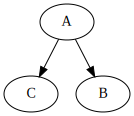

In [12]:
g = Digraph()
g.node('C')
g.edge('A', 'B')
g.edge('A', 'C')
g

In [13]:
def merge_sort(values, *, merge=recursion.merge_two):
    def helper(values):
        print(f'Called helper({values!r})')
        
        # base case: length is less than 2, return the list
        if len(values) < 2:
            return values

        halfway = len(values) // 2
        return merge(helper(values[:halfway]), helper(values[halfway:]))

    return helper(list(values))

In [14]:
merge_sort([30, 20, 10])

Called helper([30, 20, 10])
Called helper([30])
Called helper([20, 10])
Called helper([20])
Called helper([10])


[10, 20, 30]

In [15]:
def drawn_mergesort(values, *, merge=recursion.merge_two):
    vertices = {}  # Prevents vertices (which are lists) from being collected.
    graph = Digraph()
    
    def add_vertex(vertex):
        vertices[id(vertex)] = vertex  # Prevent it from being collected.
        graph.node(str(id(vertex)), label=repr(vertex))
    
    def do_mergesort(parent):
        vertices[id(parent)] = parent
        
        if len(parent) < 2:
            add_vertex(parent)
            return parent
        
        mid = len(parent) // 2
        left = parent[:mid]
        right = parent[mid:]
        result = merge(do_mergesort(left), do_mergesort(right))
        
        add_vertex(parent)
        graph.edge(str(id(parent)), str(id(left)))
        graph.edge(str(id(parent)), str(id(right)))
        
        return result
    
    do_mergesort(values)
    return graph

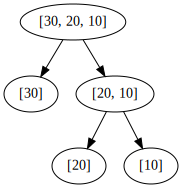

In [16]:
drawn_mergesort([30, 20, 10])

In [35]:
def _format_count(count):
    return f'{count} element' if count == 1 else f'{count} elements'

def printing_merge(left, right):
    # print(f'Merging {left!r} with {right!r}.')
    if len(left) != len(right):
        left_format = _format_count(len(left))
        right_format = _format_count(len(right))
        print(f'Merging {left_format} with {right_format}.')
    return recursion.merge_two(left, right)

def mergesort_bottomup(values):
    return recursion.merge_sort_bottom_up_stable(values, merge=printing_merge)

In [36]:
mergesort_bottomup([30, 20, 10])

Merging 2 elements with 1 element.


[10, 20, 30]

In [37]:
mergesort_bottomup([7, 6, 5, 4, 3, 2, 1])

Merging 2 elements with 1 element.
Merging 4 elements with 3 elements.


[1, 2, 3, 4, 5, 6, 7]

In [44]:
result = mergesort_bottomup(range(10_000_000))

Merging 512 elements with 128 elements.
Merging 1024 elements with 640 elements.
Merging 4096 elements with 1664 elements.
Merging 32768 elements with 5760 elements.
Merging 524288 elements with 38528 elements.
Merging 1048576 elements with 562816 elements.
Merging 8388608 elements with 1611392 elements.


In [43]:
result = recursion.merge_sort(range(10_000_000))